In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model

# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)

In [11]:
inspector.get_columns('measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Extract the last row from our data
lastrow = engine.execute('SELECT * FROM measurement WHERE id=(SELECT max(id) FROM measurement)').fetchall()

# Convert the date into a datetime object
lastdate = dt.datetime.strptime(lastrow[0][2],'%Y-%m-%d')

# Generate our data from one year prior to the last data in our table
# 52 weeks is typically considered a year but that's actually only 364 days
yearago = lastdate - dt.timedelta(days = 1, weeks = 52)


measurement_df = pd.DataFrame(session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > yearago).all())

In [13]:


measurement_df = measurement_df.dropna()
measurement_df = measurement_df.sort_values('date')

measurement_df.head(30)


,date,prcp
0,2016-08-24,0.08
1188,2016-08-24,1.22
702,2016-08-24,2.28
1875,2016-08-24,1.45
360,2016-08-24,2.15
1524,2016-08-24,2.15
1189,2016-08-25,0.21
1,2016-08-25,0.08
1007,2016-08-25,0.00
1525,2016-08-25,0.06


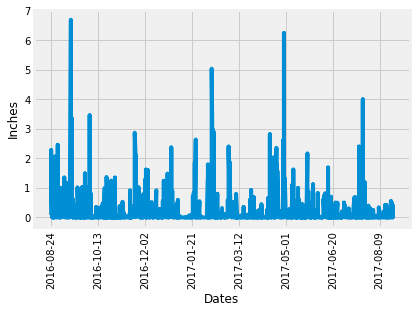

In [14]:


plt.plot(measurement_df['date'],measurement_df['prcp'])



N = 50  
xticks_pos, xticks_labels = plt.xticks()
myticks = [i for i,j in enumerate(xticks_pos) if not i%N]
plt.xticks(myticks, rotation=90)

plt.xlabel('Dates')

plt.ylabel('Inches')

plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
# Design a query to show how many stations are available in this dataset?
inspector.get_columns('station')
stationlist = engine.execute('select * from station').fetchall()
print(f'The total number of stations in this dataset is: {len(stationlist)}')

The total number of stations in this dataset is: 9


In [40]:
inspector.get_columns('station')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stationscount = engine.execute(f'SELECT station, count(tobs) FROM measurement GROUP BY station ORDER BY count(tobs) DESC').fetchall()
for station in stationscount:
    print(f'Station ID: {station[0]} Measurement Count: {station[1]}')

Station ID: USC00519281 Measurement Count: 2772
Station ID: USC00519397 Measurement Count: 2724
Station ID: USC00513117 Measurement Count: 2709
Station ID: USC00519523 Measurement Count: 2669
Station ID: USC00516128 Measurement Count: 2612
Station ID: USC00514830 Measurement Count: 2202
Station ID: USC00511918 Measurement Count: 1979
Station ID: USC00517948 Measurement Count: 1372
Station ID: USC00518838 Measurement Count: 511


In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
activestation = stationscount[0][0]
activestation

'USC00519281'

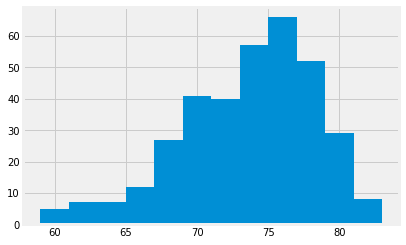

In [19]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = pd.DataFrame(session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > yearago).filter(Measurement.station == activestation).all())
temp_data.head()

plt.hist(temp_data['tobs'],bins = 12)
plt.show()


## Bonus Challenge Assignment

In [20]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [21]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
ourvacay = []
#Our first vacation will be from December 20 - January 4
ourvacay.append(calc_temps('2016-12-20', '2017-01-04')[0])
# Our second vacation will be from June 10 - June 21
ourvacay.append(calc_temps('2016-06-10', '2016-06-21')[0])

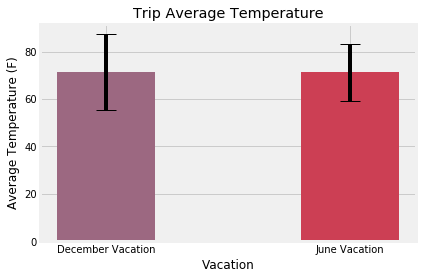

In [22]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
err = []
for i in ourvacay:
    err.append(i[2] - i[0])

err
labels = ['December Vacation', 'June Vacation']

plt.bar(labels,ourvacay[0][1],yerr = err, width = [0.4,0.4], color = ['#9c6881','#cc3f54'], capsize = 10)
plt.title('Trip Average Temperature')
plt.ylabel('Average Temperature (F)')
plt.xlabel('Vacation')
plt.show()

In [77]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


# December Vacation
dstart = dt.datetime(2016, 12, 20)
dend = dt.datetime(2017,1,4)
dec_df = pd.DataFrame(session.query(Measurement.station, Measurement.date, Measurement.prcp).filter(Measurement.date <= dend).filter(Measurement.date >= dstart))
station_dictionary = {}
for eachstation in dec_df['station'].unique():
    station_dictionary[eachstation] = {}


for station in dec_df['station'].unique():
    temp_df = dec_df.loc[dec_df['station'] == station,:]
    precipitation = temp_df['prcp'].sum()
    for statid in stationlist:
            
        if statid[1] == station:
            station_dictionary[station]['Elevation'] = statid[5]
            station_dictionary[station]['Name'] = statid[2]
            station_dictionary[station]['Latitude'] = statid[3]
            station_dictionary[station]['Longitude'] = statid[4]
            station_dictionary[station]['Precipitation'] = precipitation
            
# June Vacation
jstart = dt.datetime(2016,6,10)
jend = dt.datetime(2016,6,21)

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [78]:
station_dictionary

{'USC00519397': {'Elevation': 3.0,
  'Name': 'WAIKIKI 717.2, HI US',
  'Latitude': 21.2716,
  'Longitude': -157.8168,
  'Precipitation': 0.24000000000000002},
 'USC00513117': {'Elevation': 14.6,
  'Name': 'KANEOHE 838.1, HI US',
  'Latitude': 21.4234,
  'Longitude': -157.8015,
  'Precipitation': 2.15},
 'USC00514830': {'Elevation': 7.0,
  'Name': 'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  'Latitude': 21.5213,
  'Longitude': -157.8374,
  'Precipitation': 1.55},
 'USC00517948': {'Elevation': 11.9,
  'Name': 'PEARL CITY, HI US',
  'Latitude': 21.3934,
  'Longitude': -157.9751,
  'Precipitation': 0.06},
 'USC00519523': {'Elevation': 19.5,
  'Name': 'WAIMANALO EXPERIMENTAL FARM, HI US',
  'Latitude': 21.33556,
  'Longitude': -157.71139,
  'Precipitation': 0.7},
 'USC00519281': {'Elevation': 32.9,
  'Name': 'WAIHEE 837.5, HI US',
  'Latitude': 21.45167,
  'Longitude': -157.84888999999998,
  'Precipitation': 2.8899999999999997},
 'USC00516128': {'Elevation': 152.4,
  'Name': 'MANOA LYON ARBO

In [24]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [25]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [26]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [27]:
# Plot the daily normals as an area plot with `stacked=False`
